<a href="https://colab.research.google.com/github/Yang-Hyeon-Seo/IT-Business-2022/blob/main/EDA2020medical_checkup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 체중과 흡연, 음주가 당뇨에 미치는 영향 시각화
* 전체 중 당뇨환자로 의심되는 사람(식전혈당(공복혈당) > 125)의 비율 확인
* 체중과 식전혈당(공복혈당)의 연관성 확인  
* 흡연 여부에 따른 당뇨 환자 수 비교  
* 음주 여부에 따른 당뇨 환자 수 비교  

## 라이브러리 및 파일 불러오기

In [249]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [250]:
import pandas as pd

# health data 데이터 가져오기
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/IT-Business/health_data.csv")
display(data.head()) 
print(data.info())  

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   가입자일련번호      10000 non-null  int64  
 2   시도코드         10000 non-null  int64  
 3   성별코드         10000 non-null  object 
 4   연령대코드(5세단위)  10000 non-null  int64  
 5   신장(5Cm단위)    10000 non-null  int64  
 6   체중(5Kg 단위)   10000 non-null  int64  
 7   허리둘레         10000 non-null  float64
 8   시력(좌)        10000 non-null  float64
 9   시력(우)        10000 non-null  float64
 10  청력(좌)        10000 non-null  int64  
 11  청력(우)        10000 non-null  int64  
 12  수축기혈압        9912 non-null   float64
 13  이완기혈압        9912 non-null   float64
 14  식전혈당(공복혈당)   9912 non-null   float64
 15  총콜레스테롤       4044 non-null   float64
 16  트리글리세라이드     4044 non-null   float64
 17  HDL콜레스테롤     4044 non-null   float64
 18  LDL콜레스테롤     3977 non-null   float64
 19  혈색소  

In [251]:
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt

%matplotlib inline

### 결측치 처리
당뇨 여부를 확인하기 위해선 식전혈당(공복혈당)의 값이 있어야 하기 때문에 해당 값이 결측치인 사례를 제거한다

In [252]:
data_dropNA = data.dropna(subset = ['식전혈당(공복혈당)'], axis=0)   #열삭제의 경우 axis =1  (또는 특정 개수 이상의 결측치가 있는 경우만 삭제 thresh = 갯수)
print("결측행 모두 제거: ", data_dropNA.shape)    # 결측치 13행 모두 없어졌는지 확인

결측행 모두 제거:  (9912, 31)


### 새로운 변수 diabetes 생성하기
식전혈당(공복혈당)을 이용해 당뇨 기준 수치인 125를 넘는 경우에는 당뇨 의심 사례로 1, 125 이하인 경우에는 0인 범주형 변수(diabetes)를 새로 만든다

In [253]:
data_dropNA['diabetes'] = [1 if s >125 else 0 for s in data_dropNA['식전혈당(공복혈당)']] 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [254]:
display(data_dropNA.head()) 
print(data_dropNA.info())  

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자,diabetes
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021,0
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021,0
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021,0
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021,1
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9912 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         9912 non-null   int64  
 1   가입자일련번호      9912 non-null   int64  
 2   시도코드         9912 non-null   int64  
 3   성별코드         9912 non-null   object 
 4   연령대코드(5세단위)  9912 non-null   int64  
 5   신장(5Cm단위)    9912 non-null   int64  
 6   체중(5Kg 단위)   9912 non-null   int64  
 7   허리둘레         9912 non-null   float64
 8   시력(좌)        9912 non-null   float64
 9   시력(우)        9912 non-null   float64
 10  청력(좌)        9912 non-null   int64  
 11  청력(우)        9912 non-null   int64  
 12  수축기혈압        9912 non-null   float64
 13  이완기혈압        9912 non-null   float64
 14  식전혈당(공복혈당)   9912 non-null   float64
 15  총콜레스테롤       4044 non-null   float64
 16  트리글리세라이드     4044 non-null   float64
 17  HDL콜레스테롤     4044 non-null   float64
 18  LDL콜레스테롤     3977 non-null   float64
 19  혈색소   

In [255]:
display(data_dropNA['diabetes'], data_dropNA['식전혈당(공복혈당)'])
#display로 표현되는 행들 중 3번 행만 공복혈당이 125를 초과하기 때문에 1로 표현되어야 하고, 실제로 그렇다는 것을 확인가능

0       0
1       0
2       0
3       1
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: diabetes, Length: 9912, dtype: int64

0        90.0
1        87.0
2       102.0
3       146.0
4       110.0
        ...  
9995    120.0
9996    117.0
9997     86.0
9998    118.0
9999    105.0
Name: 식전혈당(공복혈당), Length: 9912, dtype: float64

## 전체 중 당뇨병 환자로 추정되는 사람의 비율 분석하기

### 박스플롯을 통해 식전혈당(공복혈당)의 분포 확인하기

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49885 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54792 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45817 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_

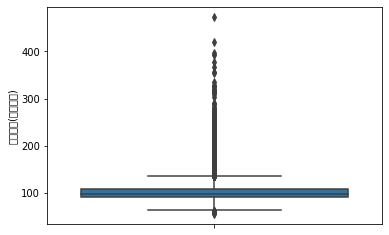

In [256]:
sns.boxplot(data = data_dropNA, y = '식전혈당(공복혈당)')

박스 플롯을 통해 식전혈당(공복혈당)의 데이터는 전체적으로 넓게 분포되어 있지만, 대부분의 값은 약 50과 150사이에 존재한다는 것을 확인할 수 있다.  
상자 아래 가로선 (최솟값)과 상자 위 가로선 (최댓값)을 넘는 사례들이 굉장히 많이 퍼져있다는 것을 확인할 수 있고, 이들이 이상치가 아니라는 가정 하에 공복혈당은 편차가 매우 큰 변수라는 것을 알 수 있다.  
당뇨병의 기준인 125를 훨씬 초과하는 사례도 꽤 많은 것으로 보인다

### 당뇨로 의심되는 사람 수(식전혈당(공복혈당)>125)와 의심되지 않는 사람 수 비교
막대 그래프를 통해 시각적으로 비교

In [257]:
df_dia = data_dropNA.groupby('diabetes' , as_index = False).agg( count = ('diabetes', 'count'))
df_dia #as_index = False를 하면 drv의 종류에 따라 범주를 구분한다

,diabetes,count
0,0,8905
1,1,1007


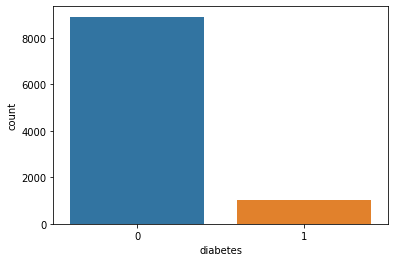

In [258]:
sns.barplot(data = df_dia, x = 'diabetes', y = 'count')

당뇨가 아닐 것으로 보이는 사람 수(8905 명)가 당뇨로 의심되는 사람의 수(1007 명) 보다 훨씬 많음을 확인할 수 있다(약 8 배)


## 체중과 식전혈당(공복혈당)의 연관성 확인
체중의 변화에 따른 공복혈당의 변화 시각화

In [291]:
df_weight = data_dropNA.groupby('체중(5Kg 단위)' , as_index = False).agg( count = ('체중(5Kg 단위)', 'count'))
df_weight

,체중(5Kg 단위),count
0,30,5
1,35,24
2,40,170
3,45,595
4,50,1202
5,55,1529
6,60,1601
7,65,1480
8,70,1214
9,75,895


In [293]:
df_weight_mean = data_dropNA.groupby('체중(5Kg 단위)' , as_index = False).agg( count = ('식전혈당(공복혈당)', 'mean'))
df_weight_mean

,체중(5Kg 단위),count
0,30,102.600000
1,35,94.333333
2,40,96.458824
3,45,97.983193
4,50,98.085691
5,55,101.294310
6,60,102.412867
7,65,105.776351
8,70,106.817957
9,75,108.343017


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45800 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_te

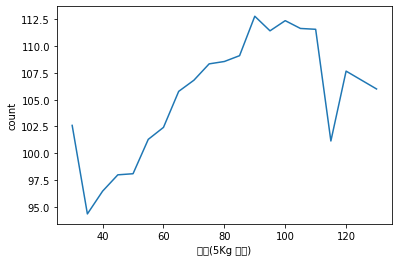

In [294]:
sns.lineplot(data = df_weight_mean, x = '체중(5Kg 단위)', y = 'count')

35kg 이하 범위와 105kg 이상 범위는 해당하는 사례의 수가 많지 않기 때문에 40~100kg 범위만 분석에 활용하기로 한다.  
몸무게가 많이 나갈수록 공복혈당이 높을 것이라고 생각했고, 그 결과 각 범위의 평균이 우상향하는 그래프를 그릴 것이라고 예상한 것과 같이, 몸무게가 늘어날수록 공복혈당이 올라가는 것을 확인할 수 있다.   
평균이 당뇨의 기준인 125를 넘어가는 범주는 없었지만, **전체적으로 체중이 많이 나갈수록 공복혈당이 높아지는 것을 알 수 있다.**  
**따라서 체중과 공복혈당은 서로 비례하는 관계가 있다고 볼 수 있다.**

## 흡연 여부에 따른 당뇨 환자 수 비교
막대그래프 이용

In [260]:
df_smoke = data_dropNA.groupby('흡연상태' , as_index = False).agg( count = ('diabetes', 'sum'))
df_smoke

,흡연상태,count
0,No,515
1,NotNow,238
2,Yes,254


In [261]:
print(515+238+254)

1007


당뇨로 의심되는 경우 값은 1, 의심되지 않는 경우 값은 0이기 때문에 sum을 통해 해당 열의 값들을 모두 더하면 당뇨로 의심되는 사례의 수만 더한 값과 동일해진다
(그렇기 때문에 df_smoke의 count값을 모두 더하면 당뇨로 의심되는 사람 수인 1007과 동일하게 된다)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 55137 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53468 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 55137 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_te

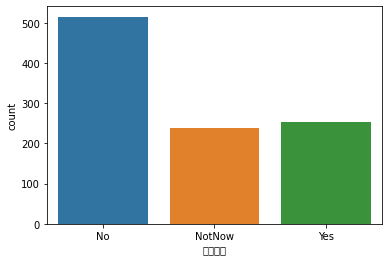

In [262]:
sns.barplot(data = df_smoke, x = '흡연상태', y = 'count')

In [263]:
df_smoke_count = data_dropNA.groupby('흡연상태' , as_index = False).agg( count = ('흡연상태', 'count'))
df_smoke_count

,흡연상태,count
0,No,6160
1,NotNow,1918
2,Yes,1832


In [264]:
print(6160+1918+1832)

9910


담배를 피지 않는 사람들 중에서 당뇨인 사람 수가 담배를 피는 사람 중에서 당뇨인 사람 수보다 많음 -> **담배를 피지 않는 사람이 많기 때문  **
=> NotNow와 Yes를 한 범주로 묶고, 샘플링을 통해 흡연상태 중에서 가장 작은 수(NotNow + Yes)와 크기를 맞춰 샘플링한 후 다시 당뇨로 의심되는 사람 수를 비교해본다(적은 수에 맞춰도 충분히 큰 수라고 판단)

### 흡연 여부를 새로운 범주형데이터로 변경
흡연했다가 끊은 경우도 흡연으로 포함하여 함께 계산한다(끊었다고 하더라도 이미 흡연을 했기 때문)

In [265]:
#흡연상태에 NA값이 존재
data_dropNA_smoke = data_dropNA.dropna(subset = ['흡연상태'], axis=0)
print("결측행 모두 제거: ", data_dropNA_smoke.shape)    # 결측치 행이 모두 없어져 9910이 되었는지 확인

결측행 모두 제거:  (9910, 32)


In [266]:
data_dropNA_smoke['smoke'] = [0 if s ==  'No' else 1 for s in data_dropNA_smoke['흡연상태']] 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [267]:
display(data_dropNA_smoke.info())
print(data_dropNA_smoke['smoke'].value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9910 entries, 0 to 9999
Data columns (total 33 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         9910 non-null   int64  
 1   가입자일련번호      9910 non-null   int64  
 2   시도코드         9910 non-null   int64  
 3   성별코드         9910 non-null   object 
 4   연령대코드(5세단위)  9910 non-null   int64  
 5   신장(5Cm단위)    9910 non-null   int64  
 6   체중(5Kg 단위)   9910 non-null   int64  
 7   허리둘레         9910 non-null   float64
 8   시력(좌)        9910 non-null   float64
 9   시력(우)        9910 non-null   float64
 10  청력(좌)        9910 non-null   int64  
 11  청력(우)        9910 non-null   int64  
 12  수축기혈압        9910 non-null   float64
 13  이완기혈압        9910 non-null   float64
 14  식전혈당(공복혈당)   9910 non-null   float64
 15  총콜레스테롤       4044 non-null   float64
 16  트리글리세라이드     4044 non-null   float64
 17  HDL콜레스테롤     4044 non-null   float64
 18  LDL콜레스테롤     3977 non-null   float64
 19  혈색소   

None

0    6160
1    3750
Name: smoke, dtype: int64


In [268]:
display(data_dropNA_smoke['smoke'], data_dropNA_smoke['흡연상태'])
#9999번째 행의 값만 NotNow이기 때문에 1로 나와야 하고 나머지는 No이기 때문에 0으로 나와야 하는데 옳은 결과가 출력됨

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    1
Name: smoke, Length: 9910, dtype: int64

0           No
1           No
2           No
3           No
4           No
         ...  
9995        No
9996        No
9997        No
9998        No
9999    NotNow
Name: 흡연상태, Length: 9910, dtype: object

### 샘플링

In [269]:
from imblearn.under_sampling import RandomUnderSampler


y = data_dropNA_smoke['smoke']
X = data_dropNA_smoke#.drop('smoke', axis =1) #axis = 0이면 행, axis = 1이면 열
display(X.columns)

Under= RandomUnderSampler(random_state=0)
X_under, y_under = Under.fit_resample(X, y)
print(y_under.value_counts(()))


Index(['기준년도', '가입자일련번호', '시도코드', '성별코드', '연령대코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '치석', '데이터공개일자', 'diabetes', 'smoke'],
      dtype='object')

0    3750
1    3750
Name: smoke, dtype: int64


In [270]:
print(1918 + 1832)

3750


NotNow와 Yes의 합인 3750과 샘플링한 결과의 수가 같게 나옴  
X_under에는 smoke가 1인 것 3750개와 0인 것 3750개가 존재 -> 동일한 수로 샘플링이 됨

In [271]:
print(y_under)

0       0
1       0
2       0
3       0
4       0
       ..
7495    1
7496    1
7497    1
7498    1
7499    1
Name: smoke, Length: 7500, dtype: int64


In [272]:
print(X_under.groupby('smoke' , as_index = False).agg(count = ('smoke', 'count')))

   smoke  count
0      0   3750
1      1   3750


In [273]:
print(X_under.groupby('smoke' , as_index = False).agg( count = ('diabetes', 'sum')))

   smoke  count
0      0    327
1      1    492


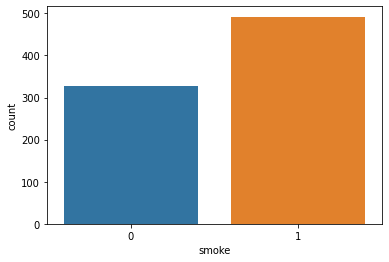

In [274]:
#막대 그래프 그리기
df_smoke = X_under.groupby('smoke' , as_index = False).agg( count = ('diabetes', 'sum'))
df_smoke
sns.barplot(data = df_smoke, x = 'smoke', y = 'count')

흡연 경험이 있는 경우, 그렇지 않은 경우보다 당뇨병 환자로 의심되는 사람 수가 약 1.5배 많다.  
즉, **흡연 경험이 있는 경우 당뇨병에 걸릴 가능성이 그렇지 않은 경우보다 약 1.5배 높다고 볼 수 있다**

## 음주 여부에 따른 당뇨 환자 수 비교

In [275]:
print(data_dropNA.info())  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9912 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         9912 non-null   int64  
 1   가입자일련번호      9912 non-null   int64  
 2   시도코드         9912 non-null   int64  
 3   성별코드         9912 non-null   object 
 4   연령대코드(5세단위)  9912 non-null   int64  
 5   신장(5Cm단위)    9912 non-null   int64  
 6   체중(5Kg 단위)   9912 non-null   int64  
 7   허리둘레         9912 non-null   float64
 8   시력(좌)        9912 non-null   float64
 9   시력(우)        9912 non-null   float64
 10  청력(좌)        9912 non-null   int64  
 11  청력(우)        9912 non-null   int64  
 12  수축기혈압        9912 non-null   float64
 13  이완기혈압        9912 non-null   float64
 14  식전혈당(공복혈당)   9912 non-null   float64
 15  총콜레스테롤       4044 non-null   float64
 16  트리글리세라이드     4044 non-null   float64
 17  HDL콜레스테롤     4044 non-null   float64
 18  LDL콜레스테롤     3977 non-null   float64
 19  혈색소   

In [276]:
#음주여부에 NA값이 존재
data_dropNA_drink = data_dropNA.dropna(subset = ['음주여부'], axis=0)
print("결측행 모두 제거: ", data_dropNA_drink.shape)    # 결측치 행이 모두 없어져 9910이 되었는지 확인

결측행 모두 제거:  (9911, 32)


음주하는 사람과 안하는 사람의 수를 세야 함

In [277]:
df_drink = data_dropNA_drink.groupby('음주여부' , as_index = False).agg( count = ('diabetes', 'count'))
df_drink

,음주여부,count
0,No,4107
1,Yes,5804


In [278]:
df_drink = data_dropNA_drink.groupby('음주여부' , as_index = False).agg( count = ('diabetes', 'sum'))
df_drink

,음주여부,count
0,No,420
1,Yes,587


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51020 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_te

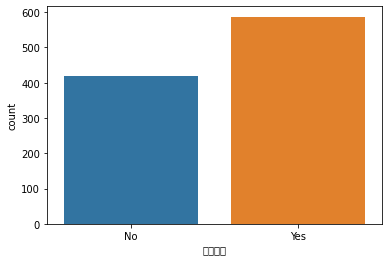

In [279]:
#막대 그래프 그리기
sns.barplot(data = df_drink, x = '음주여부', y = 'count')

막대 그래프 상에서는 음주를 하는 경우에서 당뇨병 환자로 의심되는 사람 수가 더 많지만, 전체 인원 수와 비교해봤을 때 음주한 경우와 음주하지 않는 경우 모두 각각의 약 10%정도가 당뇨병 환자로 의심된다.  
음주를 하는 경우에서 당뇨병 환자로 의심되는 사람 수가 더 많을 것으로 생각했는데, 예상한 것과 다를 것 같기 때문에 더 정확한 확인을 위해 수를 맞춰 샘플링을 해봐야 할 것같다.

### 샘플링
음주 여부에서 작은 수에 따라 샘플링한 후 막대그래프를 그린다

In [280]:
data_dropNA_drink['drink'] = [0 if s ==  'No' else 1 for s in data_dropNA_drink['음주여부']] 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [281]:
display(data_dropNA_drink.info())
print(data_dropNA_drink['drink'].value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9911 entries, 0 to 9999
Data columns (total 33 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         9911 non-null   int64  
 1   가입자일련번호      9911 non-null   int64  
 2   시도코드         9911 non-null   int64  
 3   성별코드         9911 non-null   object 
 4   연령대코드(5세단위)  9911 non-null   int64  
 5   신장(5Cm단위)    9911 non-null   int64  
 6   체중(5Kg 단위)   9911 non-null   int64  
 7   허리둘레         9911 non-null   float64
 8   시력(좌)        9911 non-null   float64
 9   시력(우)        9911 non-null   float64
 10  청력(좌)        9911 non-null   int64  
 11  청력(우)        9911 non-null   int64  
 12  수축기혈압        9911 non-null   float64
 13  이완기혈압        9911 non-null   float64
 14  식전혈당(공복혈당)   9911 non-null   float64
 15  총콜레스테롤       4043 non-null   float64
 16  트리글리세라이드     4043 non-null   float64
 17  HDL콜레스테롤     4043 non-null   float64
 18  LDL콜레스테롤     3976 non-null   float64
 19  혈색소   

None

1    5804
0    4107
Name: drink, dtype: int64


In [282]:
display(data_dropNA_drink['drink'], data_dropNA_drink['음주여부'])
#9995, 9996, 9999만 Yes이기 때문에 1로 표시되고, 나머지는 0으로 표시되어야 하고, 원하는 것과 같이 출력되었다

0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    1
9997    0
9998    0
9999    1
Name: drink, Length: 9911, dtype: int64

0        No
1        No
2        No
3        No
4        No
       ... 
9995    Yes
9996    Yes
9997     No
9998     No
9999    Yes
Name: 음주여부, Length: 9911, dtype: object

In [283]:
y = data_dropNA_drink['음주여부']
X = data_dropNA_drink #axis = 0이면 행, axis = 1이면 열
display(X.columns)

Under= RandomUnderSampler(random_state=0)
X_under, y_under = Under.fit_resample(X, y)
print(y_under.value_counts(()))


Index(['기준년도', '가입자일련번호', '시도코드', '성별코드', '연령대코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '치석', '데이터공개일자', 'diabetes', 'drink'],
      dtype='object')

No     4107
Yes    4107
Name: 음주여부, dtype: int64


In [284]:
print(X_under.groupby('drink' , as_index = False).agg(count = ('drink', 'count')))

   drink  count
0      0   4107
1      1   4107


In [285]:
print(X_under.groupby('drink' , as_index = False).agg( count = ('diabetes', 'sum')))

   drink  count
0      0    420
1      1    416


In [286]:
#막대 그래프 그리기
df_drink = X_under.groupby('drink' , as_index = False).agg( count = ('diabetes', 'sum'))
df_drink

,drink,count
0,0,420
1,1,416


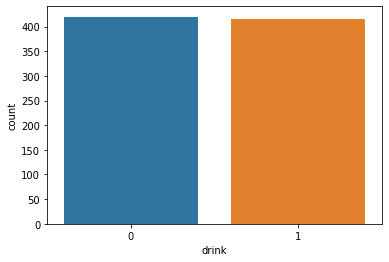

In [287]:
sns.barplot(data = df_drink, x = 'drink', y = 'count')

샘플링 결과 음주하는 경우(1)과 음주하지 않는 경우(0)의 당뇨병 환자로 의심되는 사람의 수가 거의 비슷하다. 오히려 음주하지 않는 경우의 당뇨병 환자로 의심되는 사람 수가 아주 조금 더 많다.

In [288]:
y = data_dropNA_drink['음주여부']
X = data_dropNA_drink #axis = 0이면 행, axis = 1이면 열
display(X.columns)

Under= RandomUnderSampler(random_state=1)
X_under, y_under = Under.fit_resample(X, y)
print(y_under.value_counts(()))

Index(['기준년도', '가입자일련번호', '시도코드', '성별코드', '연령대코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '치석', '데이터공개일자', 'diabetes', 'drink'],
      dtype='object')

No     4107
Yes    4107
Name: 음주여부, dtype: int64


In [289]:
df_drink2 = X_under.groupby('drink' , as_index = False).agg( count = ('diabetes', 'sum'))
df_drink2

,drink,count
0,0,420
1,1,425


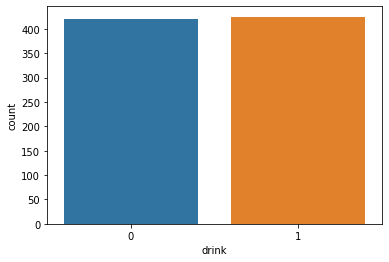

In [290]:
sns.barplot(data = df_drink2, x = 'drink', y = 'count')

random_state를 바꿔서 실행한 결과 이전과 같이 음주를 하는 경우와 하지 않는 경우의 당뇨로 의심되는 사람 수는 거의 비슷하고, 이번에는 음주를 하는 경우(1)의 당뇨로 의심되는 사람 수가 아주 조금 더 많은 것을 확인할 수 있다.  
**이를 통해 음주 여부는 당뇨병 여부와 크게 상관이 없는 것으로 볼 수 있다.**

## 결론
1. 체중이 많이 나가면 공복혈당이 높을 가능성이 높다.  
2. 음주 여부가 당뇨병 여부에 크게 관련이 없을 수 있다.  
3. 흡연 경험이 있는 경우, 흡연하지 않는 경우보다 당뇨병에 걸릴 가능성이 높다